In [315]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats

In [316]:
df = pd.read_csv("https://raw.githubusercontent.com/ajkam/schulich_data_science/main/Final_Prep/Insurance_Company_Complaints__Resolutions__Status__and_Recoveries.csv")

In [317]:
df.head()

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status
0,"Anthem Health Plans, Inc",7045593,05/31/2022,06/02/2022,Group,Health Only,Claim Handling,Medically Necessary,Company Position Substantiated,Company Position Upheld,0.00,Closed
1,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,Health Only,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
2,"Anthem Health Plans, Inc",7044860,05/03/2022,06/02/2022,A & H,Health Only,Claim Handling,Denial,Claim Settled,Claim Paid,147.58,Closed
3,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,A & H,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed
4,"Anthem Health Plans, Inc",7052007,02/23/2023,03/17/2023,A & H,A & H,Marketing & Sales,Duplicate Coverage,Compromised Settlement/Resolution,Premium Refund,2179.32,Closed


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38267 entries, 0 to 38266
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      38267 non-null  object 
 1   File No.     38267 non-null  int64  
 2   Opened       38267 non-null  object 
 3   Closed       37304 non-null  object 
 4   Coverage     35827 non-null  object 
 5   SubCoverage  29307 non-null  object 
 6   Reason       35650 non-null  object 
 7   SubReason    35650 non-null  object 
 8   Disposition  22979 non-null  object 
 9   Conclusion   21173 non-null  object 
 10  Recovery     38267 non-null  float64
 11  Status       38267 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.5+ MB


In [319]:
df.describe()

,File No.,Recovery
count,3.826700e+04,38267.000000
mean,7.032932e+06,1731.634862
std,1.890661e+04,15224.331603
min,7.000002e+06,0.000000
25%,7.013760e+06,0.000000
50%,7.042086e+06,0.000000
75%,7.049744e+06,0.000000
max,7.056168e+06,843825.850000


In [320]:
df.isna().sum()

Company            0
File No.           0
Opened             0
Closed           963
Coverage        2440
SubCoverage     8960
Reason          2617
SubReason       2617
Disposition    15288
Conclusion     17094
Recovery           0
Status             0
dtype: int64

In [321]:
missing_proportion = df.isna().sum() / len(df)
print(missing_proportion)


Company        0.000000
File No.       0.000000
Opened         0.000000
Closed         0.025165
Coverage       0.063763
SubCoverage    0.234144
Reason         0.068388
SubReason      0.068388
Disposition    0.399509
Conclusion     0.446703
Recovery       0.000000
Status         0.000000
dtype: float64


In [322]:
print(df['Closed'].unique())


['06/02/2022' '03/17/2023' '05/02/2023' ... '08/26/2019' '04/10/2021'
 '07/08/2019']


In [323]:
df=df.dropna(subset=['Closed'])


In [324]:
df.isna().sum()

Company            0
File No.           0
Opened             0
Closed             0
Coverage        2273
SubCoverage     8628
Reason          2436
SubReason       2436
Disposition    14420
Conclusion     16248
Recovery           0
Status             0
dtype: int64

In [325]:
print(df['Coverage'].unique())


['Group' 'A & H' 'Individual' 'Individual Private Passenger' nan
 'Homeowners' 'Commercial Multi-Peril' 'Individual Life' 'Travel' 'Title'
 'General' 'Motorhome' 'Commercial' 'Pet Insurance' 'Umbrella'
 'Individual Annuities' "Workers' Compensation" 'Group Life' 'Motorcycle'
 'Condo/Townhome' 'Professional/E&O' 'Life and Annuity'
 'Extended Warranty & Service Contracts' 'Extended Warranty'
 'Inland Marine' 'Watercraft' 'Auto Warranty' 'Credit Accident & Health'
 'Renter/Tenants' 'Fidelity & Surety' 'Group Private Passenger' 'IRA'
 'Fire, Allied Lines' 'Dwelling Fire' 'Other [Enter Coverage]'
 'Federal Flood' 'Mobile Homeowner' 'Crop/Hail' 'Group Annuities'
 'Farm owner/Ranch owner' 'Rental' 'Credit Life'
 'Portable Electronics Ins' 'Unknown' 'Ocean Marine' 'Federal Programs'
 "Builder's Risk" 'Portable Electronics' 'Credit Property'
 'Business Interruption' 'Motorsport' 'Products' 'Aircraft'
 'Directors & Officers']


In [326]:
df=df.dropna(subset=['Coverage'])


Dropped values because the proportion is less than 10% and it makes no sense to assign a random coverage as it will affect the distribution

In [327]:
print(df['SubCoverage'].unique())


['Health Only' 'A & H' 'Long Term Care' 'Collision' 'Homeowners'
 'Health Exchange' 'Fire - Real Property' nan 'Hazard'
 'Rental Reimbursement' 'Medicare Supplement Plan G' 'Condo Association'
 'Medicare Supplement(Policies or Certs)' 'Liability' 'Comprehensive'
 'Term' 'Fixed' 'Self Funded/ERISA' 'Exchange' 'Dental' 'HMO'
 'Surplus Lines' 'Pollution' 'Medicare Prescription Drug/Part D'
 'Medicare' 'Prescription' 'Medicare Advantage' 'Mental Health'
 'Universal' 'Whole Life' 'Windstorm' 'Dental Exchange' 'Physical Damage'
 'Excess Loss' 'Exchange-Individual Health' 'Personal Umbrella'
 'Short Term Medical' 'Disability Income' 'Accidental Only'
 'Limited Benefits' 'Commercial Multi-Peril' 'Medicare Supplement Plan J'
 'Back up Sewer/Sump Pump' 'Pharmacy Benefits' 'Small Group' 'Vision'
 'Commercial Auto' 'Unknown' 'Medicare Supplement Plan F' 'Student Health'
 'Personal Property' 'Variable' 'Other' 'Flood' 'Large Group' 'Mold'
 'Tenant Homeowners' 'Medical Payments' 'Limited Benefit Hea

In [328]:
df['SubCoverage']=df['SubCoverage'].fillna("No_SubCoverage")

Most likely scenario according to the dataset is that units with a Coverage might not have a specific Subcoverage plan or they dont have subcoverage so the best thing is to fill it

In [329]:
df.isna().sum()

Company            0
File No.           0
Opened             0
Closed             0
Coverage           0
SubCoverage        0
Reason           360
SubReason        360
Disposition    12222
Conclusion     14077
Recovery           0
Status             0
dtype: int64

In [330]:
print(df['Reason'].unique())


['Claim Handling' 'Marketing & Sales' 'PolicyHolder Service'
 'Underwriting' nan]


In [331]:
print(df['Reason'].mode())


0    Claim Handling
Name: Reason, dtype: object


<Axes: xlabel='Reason', ylabel='Count'>

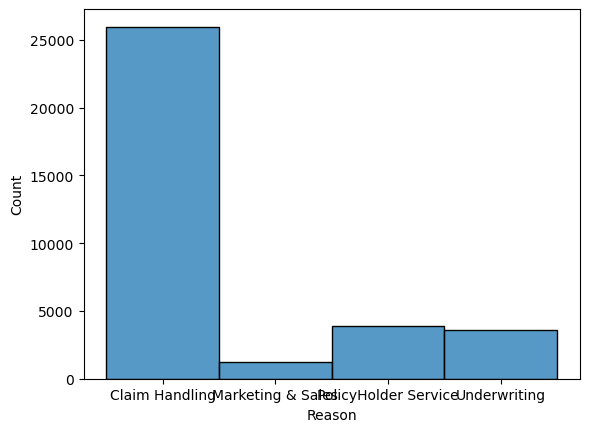

In [332]:
sns.histplot(df['Reason'])

In [333]:
df['Reason']=df['Reason'].fillna("Claim Handling")

Based on the histogram Claim Handling is the most common reason therefore it makes no differences if the the 360 missing values aref filled with the mode

<Axes: xlabel='Reason', ylabel='Count'>

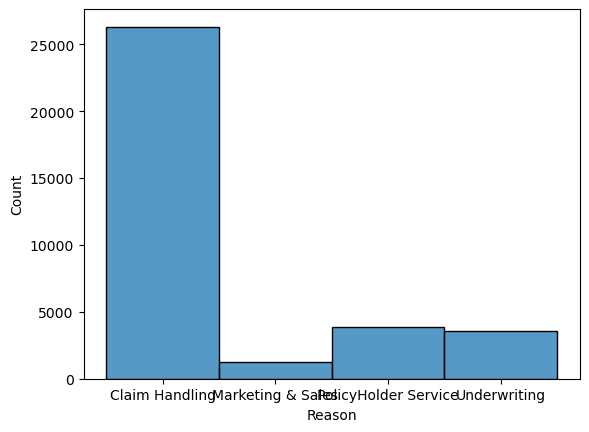

In [334]:
sns.histplot(df['Reason'])

In [335]:
print(df['SubReason'].unique())


['Medically Necessary' 'Provider Contract Issue' 'Denial'
 'Duplicate Coverage' 'Premium/Notice' 'Claim Denial'
 'Unsatisfactory Settlement/Offer' 'Surprise Billing' 'Claim Delays'
 'External Review' 'Other' 'Medical Necessity' 'UR Case Management'
 'Medical Necessity Denial' 'UR MEDICALLY NECESSARY DENIAL'
 'CPT Code Issue' 'Claim Handling Other' 'Adjuster Handling'
 'Excessive Charges' 'Duplication of Coverage' 'Policy Information'
 'Coverage Question' 'Claim Delay' 'Unsatisfactory Settlement'
 'Cancellation' 'Premium & Rating' 'Storage Fees'
 'Unlicensed Adjuster/Appraiser' 'UR Procedure' 'Unsatisfactory Offer'
 'Internal Appeal' 'Marketing/Sales other' 'Nonrenewal' 'Claim Procedure'
 'Premiums Misquoted' 'Co-pay, Deductible, and Co-Insurance Issues'
 'Eligibility of Provider' 'Delays/No Response' 'Misleading Advertising'
 'Loss of Use' 'Policy Service Delay by Insurer' 'Credentialing Delay'
 'Policy Service Other' 'Premium Refund Delay' 'Premium Notice/Billing'
 'Coordination of Be

There are so many subreasons and it makes no sense to add the mode subreason to fill the data so delete it as its less than 10%

In [336]:
df=df.dropna(subset=['SubReason'])


In [337]:
df.isna().sum()

Company            0
File No.           0
Opened             0
Closed             0
Coverage           0
SubCoverage        0
Reason             0
SubReason          0
Disposition    12081
Conclusion     13748
Recovery           0
Status             0
dtype: int64

<Axes: xlabel='Disposition', ylabel='Count'>

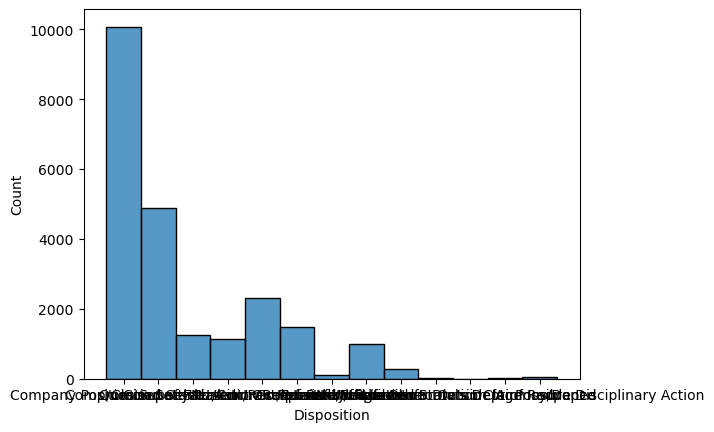

In [338]:
sns.histplot(df['Disposition'])

In [339]:
df=df.dropna(subset=['Disposition'])


We cannot add a random disposition so we are going drop it

<Axes: xlabel='Conclusion', ylabel='Count'>

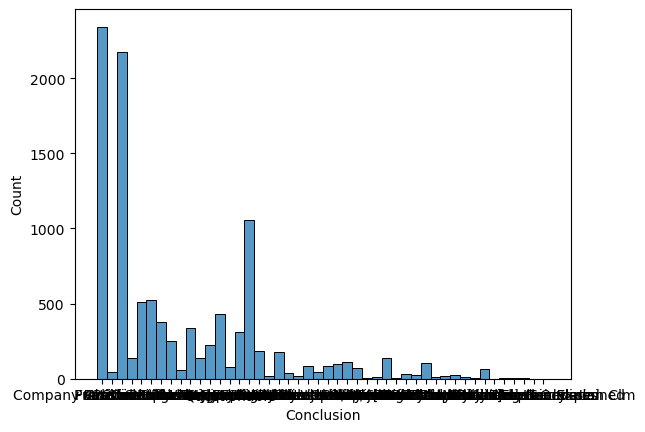

In [340]:
sns.histplot(df['Conclusion'])

In [341]:
df=df.dropna(subset=['Conclusion'])


We cannot add a random disposition so we are going drop it

In [342]:
df.isna().sum()

Company        0
File No.       0
Opened         0
Closed         0
Coverage       0
SubCoverage    0
Reason         0
SubReason      0
Disposition    0
Conclusion     0
Recovery       0
Status         0
dtype: int64

In [343]:
df.describe()

,File No.,Recovery
count,1.041200e+04,10412.000000
mean,7.045145e+06,2209.166722
std,1.143168e+04,15287.719055
min,7.000149e+06,0.000000
25%,7.043138e+06,0.000000
50%,7.048155e+06,0.000000
75%,7.051456e+06,183.800000
max,7.055852e+06,422799.970000


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10412 entries, 0 to 38262
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      10412 non-null  object 
 1   File No.     10412 non-null  int64  
 2   Opened       10412 non-null  object 
 3   Closed       10412 non-null  object 
 4   Coverage     10412 non-null  object 
 5   SubCoverage  10412 non-null  object 
 6   Reason       10412 non-null  object 
 7   SubReason    10412 non-null  object 
 8   Disposition  10412 non-null  object 
 9   Conclusion   10412 non-null  object 
 10  Recovery     10412 non-null  float64
 11  Status       10412 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.0+ MB


<Axes: >

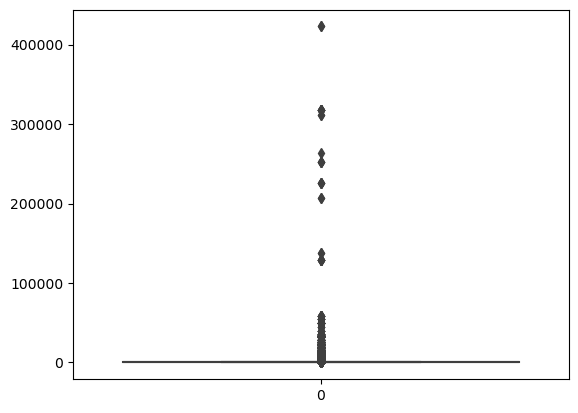

In [345]:
sns.boxplot(df['Recovery'])

In [346]:
print(scipy.stats.skew(df['Recovery']))
print(scipy.stats.kurtosis(df['Recovery'], fisher=True))


17.022565071146843
343.9542239323604


In [347]:
df.drop(df[df['Recovery']>100000].index, axis=0, inplace=True)


<Axes: >

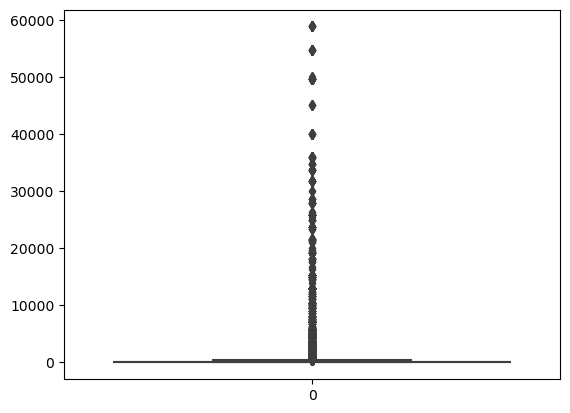

In [348]:
sns.boxplot(df['Recovery'])

Remove outliers from recovery over 100 000 as the data is highly skewed and leptourkurtic so the huge chunk of data below might seem like outliers but because of skewness and taildness it is actually good data

In [349]:
df.drop_duplicates(inplace=True)

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10345 entries, 0 to 38262
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      10345 non-null  object 
 1   File No.     10345 non-null  int64  
 2   Opened       10345 non-null  object 
 3   Closed       10345 non-null  object 
 4   Coverage     10345 non-null  object 
 5   SubCoverage  10345 non-null  object 
 6   Reason       10345 non-null  object 
 7   SubReason    10345 non-null  object 
 8   Disposition  10345 non-null  object 
 9   Conclusion   10345 non-null  object 
 10  Recovery     10345 non-null  float64
 11  Status       10345 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.0+ MB


In [351]:
def money(x):
    if x > 0 :
        return 'MADE MONEY'
    else:
        return 'NO MONEY'

Create a binary variable function

In [352]:
df['MONEY']= df['Recovery'].apply(money)

Appply the binary variable function to Recovery to create a variable to show whether money was made or not based on the claim

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10345 entries, 0 to 38262
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      10345 non-null  object 
 1   File No.     10345 non-null  int64  
 2   Opened       10345 non-null  object 
 3   Closed       10345 non-null  object 
 4   Coverage     10345 non-null  object 
 5   SubCoverage  10345 non-null  object 
 6   Reason       10345 non-null  object 
 7   SubReason    10345 non-null  object 
 8   Disposition  10345 non-null  object 
 9   Conclusion   10345 non-null  object 
 10  Recovery     10345 non-null  float64
 11  Status       10345 non-null  object 
 12  MONEY        10345 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [354]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, accuracy_score
     

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.stats import f_oneway
from sklearn.ensemble import GradientBoostingClassifier


In [356]:
df

,Company,File No.,Opened,Closed,Coverage,SubCoverage,Reason,SubReason,Disposition,Conclusion,Recovery,Status,MONEY
0,"Anthem Health Plans, Inc",7045593,05/31/2022,06/02/2022,Group,Health Only,Claim Handling,Medically Necessary,Company Position Substantiated,Company Position Upheld,0.00,Closed,NO MONEY
1,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,Health Only,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed,MADE MONEY
2,"Anthem Health Plans, Inc",7044860,05/03/2022,06/02/2022,A & H,Health Only,Claim Handling,Denial,Claim Settled,Claim Paid,147.58,Closed,MADE MONEY
3,"Anthem Health Plans, Inc",7043381,02/28/2022,06/02/2022,Group,A & H,Claim Handling,Provider Contract Issue,Claim Settled,Satisfied,6467.30,Closed,MADE MONEY
4,"Anthem Health Plans, Inc",7052007,02/23/2023,03/17/2023,A & H,A & H,Marketing & Sales,Duplicate Coverage,Compromised Settlement/Resolution,Premium Refund,2179.32,Closed,MADE MONEY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38238,Cigna Health and Life Insurance Company,7047624,08/31/2022,09/29/2022,Group,A & H,Claim Handling,Claim Delay,Claim Settled,Provider Issue,15373.80,Closed,MADE MONEY
38244,Esurance Insurance Company,7016374,08/29/2018,09/19/2018,Individual Private Passenger,Liability,Claim Handling,Actual Cash Value Dispute,Company Position Substantiated,Corrective Action,252.78,Closed,MADE MONEY
38250,Mid-Century Insurance Company,7014018,12/11/2018,12/24/2018,Individual Private Passenger,No_SubCoverage,Underwriting,Cancellation,Compromised Settlement/Resolution,Satisfactory Explanation,0.00,Closed,NO MONEY
38253,Selective Insurance Company of America,7046479,07/13/2022,08/25/2022,Individual Private Passenger,Liability,Claim Handling,Claim Delays,Company Position Substantiated,Company Position Upheld,0.00,Closed,NO MONEY


In [357]:
total_count = df['MONEY'].count()


made_money_count = df[df['MONEY'] == 'MADE MONEY']['MONEY'].count()
no_money_count = df[df['MONEY'] == 'NO MONEY']['MONEY'].count()


made_money_proportion = made_money_count / total_count
no_money_proportion = no_money_count / total_count

print("Made Money Proportion:", made_money_proportion)
print("No Money Proportion:", no_money_proportion)

Made Money Proportion: 0.2935717738037699
No Money Proportion: 0.70642822619623


Figur out the proportion of Made Money compared to total and No Money compared to total

Hypothesiss that Coverage    SubCoverage   Reason Company     SubReason are the most important to predict Money

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10345 entries, 0 to 38262
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      10345 non-null  object 
 1   File No.     10345 non-null  int64  
 2   Opened       10345 non-null  object 
 3   Closed       10345 non-null  object 
 4   Coverage     10345 non-null  object 
 5   SubCoverage  10345 non-null  object 
 6   Reason       10345 non-null  object 
 7   SubReason    10345 non-null  object 
 8   Disposition  10345 non-null  object 
 9   Conclusion   10345 non-null  object 
 10  Recovery     10345 non-null  float64
 11  Status       10345 non-null  object 
 12  MONEY        10345 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [359]:
threshold = 10  # Adjust this threshold as needed

# Calculate the counts of each company
company_counts = df['Company'].value_counts()

# Get the companies to drop based on the threshold
companies_to_drop = company_counts[company_counts < threshold].index

# Remove rows with companies that have counts below the threshold
df = df[~df['Company'].isin(companies_to_drop)]

# Print the modified DataFrame
print(df)

                                       Company  File No.      Opened  \
0                     Anthem Health Plans, Inc   7045593  05/31/2022   
1                     Anthem Health Plans, Inc   7043381  02/28/2022   
2                     Anthem Health Plans, Inc   7044860  05/03/2022   
3                     Anthem Health Plans, Inc   7043381  02/28/2022   
4                     Anthem Health Plans, Inc   7052007  02/23/2023   
...                                        ...       ...         ...   
38225            Gerber Life Insurance Company   7049735  11/29/2022   
38233              ConnectiCare Benefits, Inc.   7049034  10/31/2022   
38234    Combined Insurance Company of America   7045449  05/23/2022   
38238  Cigna Health and Life Insurance Company   7047624  08/31/2022   
38244               Esurance Insurance Company   7016374  08/29/2018   

           Closed                      Coverage        SubCoverage  \
0      06/02/2022                         Group        Health Onl

An error for unseen columns in the train/test data was occuring so we need to remove records from Company based on a certain thrershold

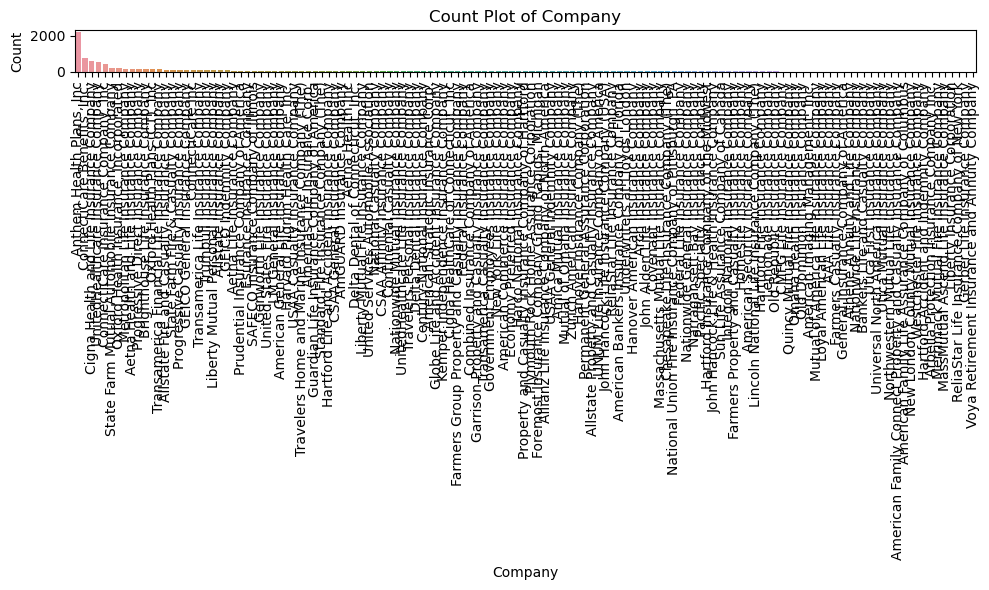

In [360]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Company', order=df['Company'].value_counts().index)
plt.title('Count Plot of Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()

In [361]:
company_counts = df['Company'].value_counts()

# Check for companies with count of 0
companies_with_zero_count = company_counts[company_counts == 0].index

# Print the result
if len(companies_with_zero_count) > 0:
    print("Companies with a count of 0:")
    for company in companies_with_zero_count:
        print(company)
else:
    print("All companies have a non-zero count.")

All companies have a non-zero count.


Finding out the companies that have a zero count

In [362]:
unknown_companies = [
    'Colony Insurance Company', 'The Burlington Insurance Company',
    'Unity Financial Life Insurance Company', 'Infinity Standard Insurance Company',
    'Nationwide Agribusiness Insurance Company', 'Utica National Insurance Company of Ohio',
    'Security Benefit Life Insurance Company', 'Connecticut FAIR Plan',
    'AIX Specialty Insurance Company', 'Arch Specialty Insurance Company',
    'Electric Insurance Company', 'Utica National Insurance Company of Texas',
    'Farmington Casualty Company', 'Wellfleet Insurance Company',
    'TypTap Insurance Company', 'Cincinnati Specialty Underwriters Insurance Company',
    'Royal Arcanum Supreme Council', 'HDI Global Insurance Company',
    'National Interstate Insurance Company'
]

unknown_company_counts = df['Company'].loc[df['Company'].isin(unknown_companies)].value_counts()

# Print the count of each unknown company
for company, count in unknown_company_counts.items():
    print(f"Company: {company}, Count: {count}")

Finding out the companies that are unknown based on the error and how many counts they have

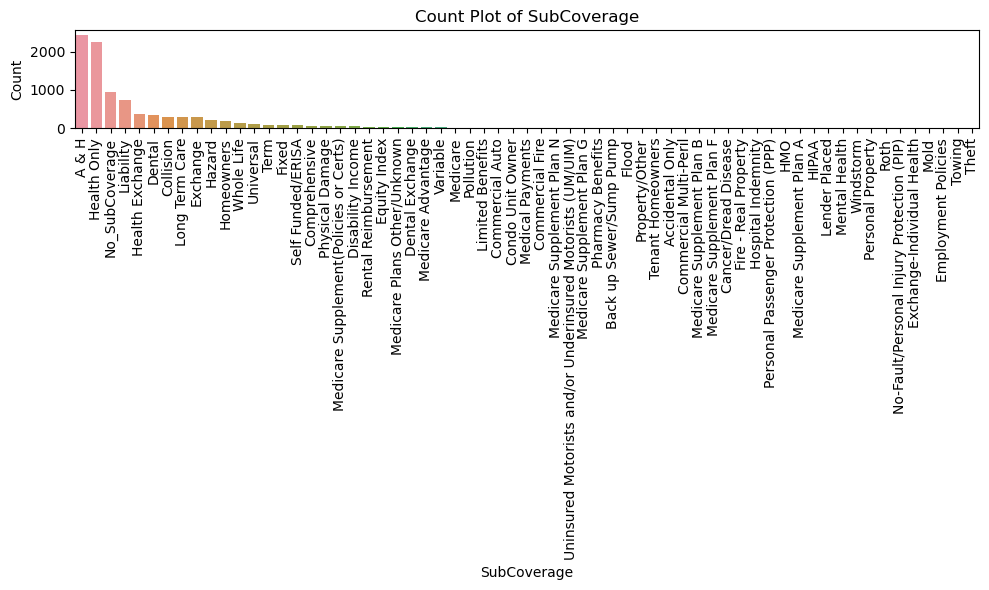

In [367]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SubCoverage', order=df['SubCoverage'].value_counts().index)
plt.title('Count Plot of SubCoverage')
plt.xlabel('SubCoverage')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()

In [368]:
threshold = 5  # Adjust this threshold as needed

# Calculate the counts of each company
company_counts = df['SubCoverage'].value_counts()

# Get the companies to drop based on the threshold
companies_to_drop = company_counts[company_counts < threshold].index

# Remove rows with companies that have counts below the threshold
df = df[~df['SubCoverage'].isin(companies_to_drop)]

# Print the modified DataFrame
print(df)

                                       Company  File No.      Opened  \
0                     Anthem Health Plans, Inc   7045593  05/31/2022   
1                     Anthem Health Plans, Inc   7043381  02/28/2022   
2                     Anthem Health Plans, Inc   7044860  05/03/2022   
3                     Anthem Health Plans, Inc   7043381  02/28/2022   
4                     Anthem Health Plans, Inc   7052007  02/23/2023   
...                                        ...       ...         ...   
38225            Gerber Life Insurance Company   7049735  11/29/2022   
38233              ConnectiCare Benefits, Inc.   7049034  10/31/2022   
38234    Combined Insurance Company of America   7045449  05/23/2022   
38238  Cigna Health and Life Insurance Company   7047624  08/31/2022   
38244               Esurance Insurance Company   7016374  08/29/2018   

           Closed                      Coverage        SubCoverage  \
0      06/02/2022                         Group        Health Onl

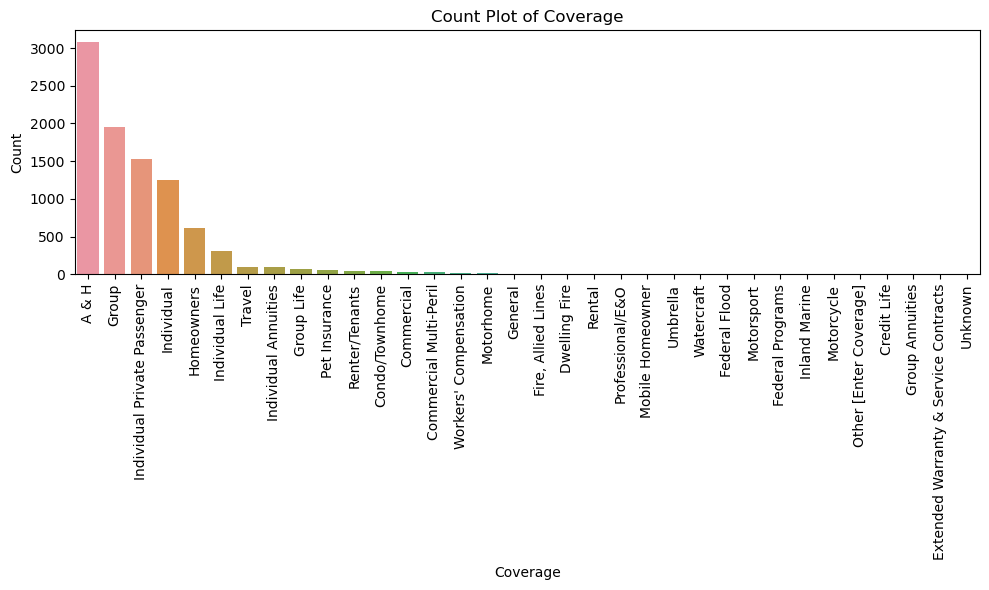

In [370]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Coverage', order=df['Coverage'].value_counts().index)
plt.title('Count Plot of Coverage')
plt.xlabel('Coverage')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()

In [375]:
threshold = 3  # Adjust this threshold as needed

# Calculate the counts of each company
company_counts = df['Coverage'].value_counts()

# Get the companies to drop based on the threshold
companies_to_drop = company_counts[company_counts < threshold].index

# Remove rows with companies that have counts below the threshold
df = df[~df['Coverage'].isin(companies_to_drop)]

# Print the modified DataFrame
print(df)

                                       Company  File No.      Opened  \
0                     Anthem Health Plans, Inc   7045593  05/31/2022   
1                     Anthem Health Plans, Inc   7043381  02/28/2022   
2                     Anthem Health Plans, Inc   7044860  05/03/2022   
3                     Anthem Health Plans, Inc   7043381  02/28/2022   
4                     Anthem Health Plans, Inc   7052007  02/23/2023   
...                                        ...       ...         ...   
38225            Gerber Life Insurance Company   7049735  11/29/2022   
38233              ConnectiCare Benefits, Inc.   7049034  10/31/2022   
38234    Combined Insurance Company of America   7045449  05/23/2022   
38238  Cigna Health and Life Insurance Company   7047624  08/31/2022   
38244               Esurance Insurance Company   7016374  08/29/2018   

           Closed                      Coverage        SubCoverage  \
0      06/02/2022                         Group        Health Onl

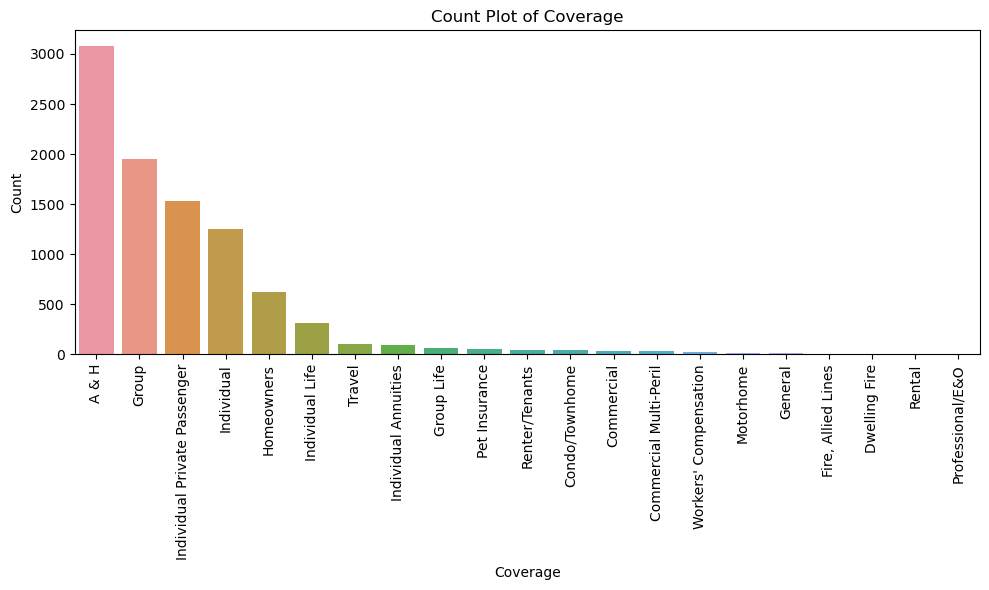

In [376]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Coverage', order=df['Coverage'].value_counts().index)
plt.title('Count Plot of Coverage')
plt.xlabel('Coverage')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()

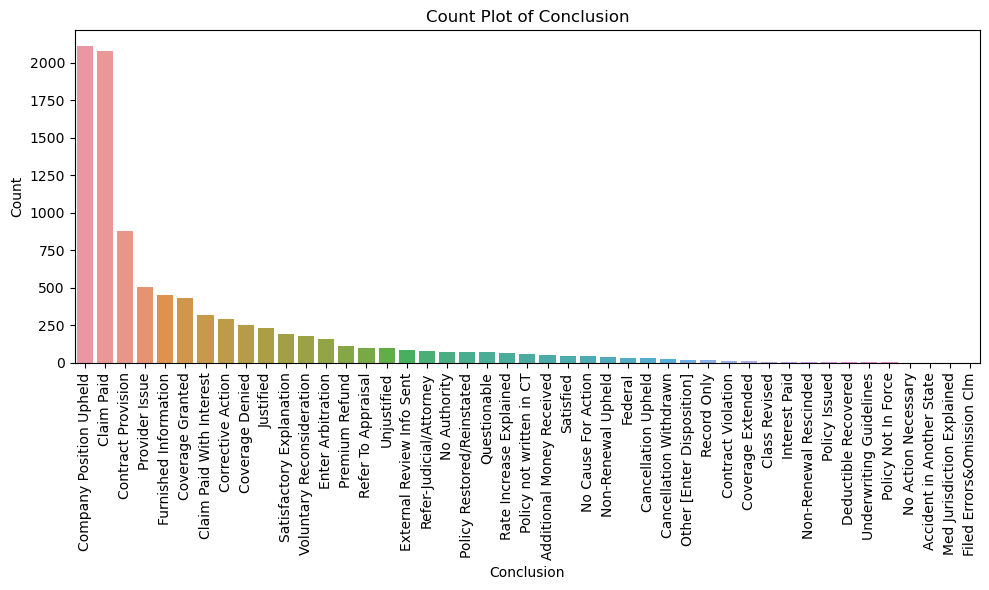

In [382]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Conclusion', order=df['Conclusion'].value_counts().index)
plt.title('Count Plot of Conclusion')
plt.xlabel('Conclusion')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

In [383]:
threshold = 3  # Adjust this threshold as needed

# Calculate the counts of each company
company_counts = df['Conclusion'].value_counts()

# Get the companies to drop based on the threshold
companies_to_drop = company_counts[company_counts < threshold].index

# Remove rows with companies that have counts below the threshold
df = df[~df['Conclusion'].isin(companies_to_drop)]

# Print the modified DataFrame
print(df)

                                       Company  File No.      Opened  \
0                     Anthem Health Plans, Inc   7045593  05/31/2022   
1                     Anthem Health Plans, Inc   7043381  02/28/2022   
2                     Anthem Health Plans, Inc   7044860  05/03/2022   
3                     Anthem Health Plans, Inc   7043381  02/28/2022   
4                     Anthem Health Plans, Inc   7052007  02/23/2023   
...                                        ...       ...         ...   
38225            Gerber Life Insurance Company   7049735  11/29/2022   
38233              ConnectiCare Benefits, Inc.   7049034  10/31/2022   
38234    Combined Insurance Company of America   7045449  05/23/2022   
38238  Cigna Health and Life Insurance Company   7047624  08/31/2022   
38244               Esurance Insurance Company   7016374  08/29/2018   

           Closed                      Coverage        SubCoverage  \
0      06/02/2022                         Group        Health Onl

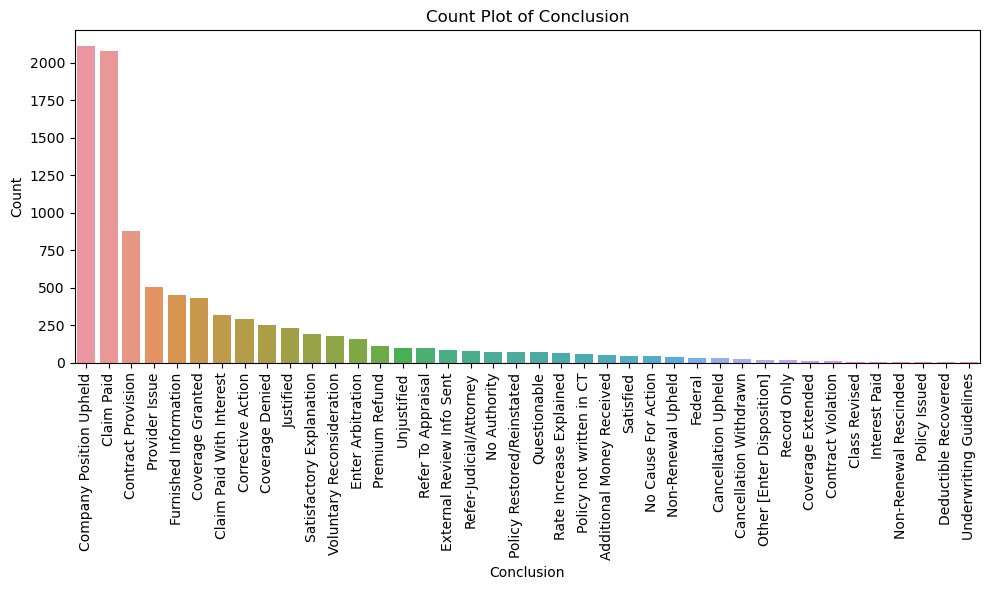

In [384]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Conclusion', order=df['Conclusion'].value_counts().index)
plt.title('Count Plot of Conclusion')
plt.xlabel('Conclusion')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

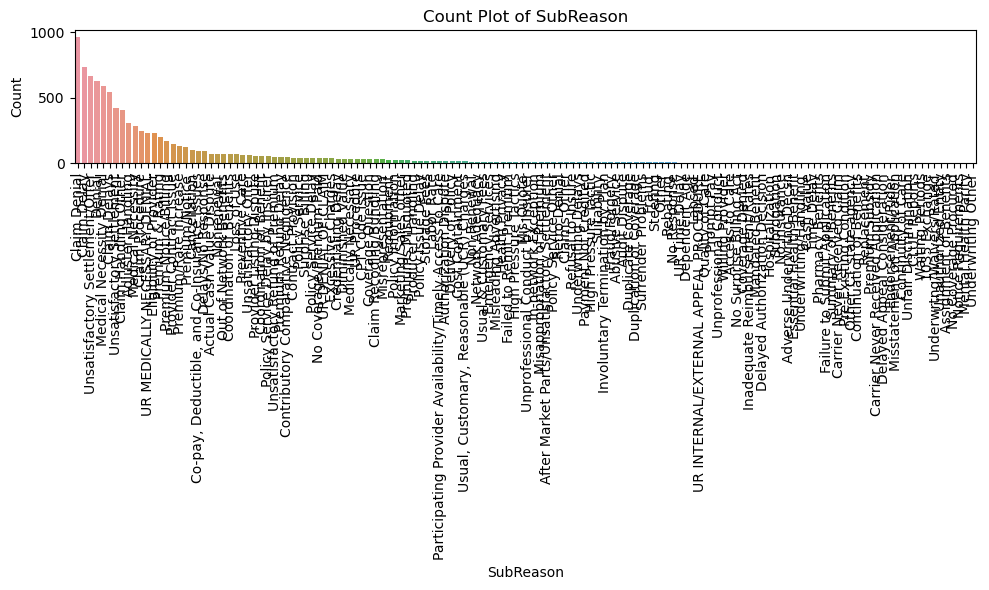

In [387]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SubReason', order=df['SubReason'].value_counts().index)
plt.title('Count Plot of SubReason')
plt.xlabel('SubReason')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

In [388]:
threshold = 3  # Adjust this threshold as needed

# Calculate the counts of each company
company_counts = df['SubReason'].value_counts()

# Get the companies to drop based on the threshold
companies_to_drop = company_counts[company_counts < threshold].index

# Remove rows with companies that have counts below the threshold
df = df[~df['SubReason'].isin(companies_to_drop)]

# Print the modified DataFrame
print(df)

                                       Company  File No.      Opened  \
0                     Anthem Health Plans, Inc   7045593  05/31/2022   
1                     Anthem Health Plans, Inc   7043381  02/28/2022   
2                     Anthem Health Plans, Inc   7044860  05/03/2022   
3                     Anthem Health Plans, Inc   7043381  02/28/2022   
4                     Anthem Health Plans, Inc   7052007  02/23/2023   
...                                        ...       ...         ...   
38225            Gerber Life Insurance Company   7049735  11/29/2022   
38233              ConnectiCare Benefits, Inc.   7049034  10/31/2022   
38234    Combined Insurance Company of America   7045449  05/23/2022   
38238  Cigna Health and Life Insurance Company   7047624  08/31/2022   
38244               Esurance Insurance Company   7016374  08/29/2018   

           Closed                      Coverage        SubCoverage  \
0      06/02/2022                         Group        Health Onl

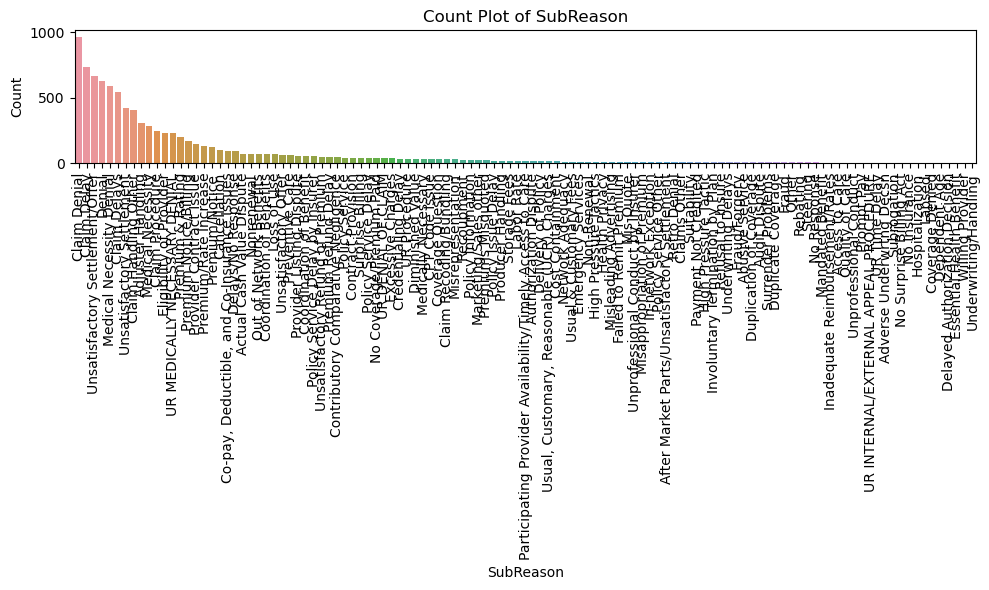

In [389]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SubReason', order=df['SubReason'].value_counts().index)
plt.title('Count Plot of SubReason')
plt.xlabel('SubReason')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

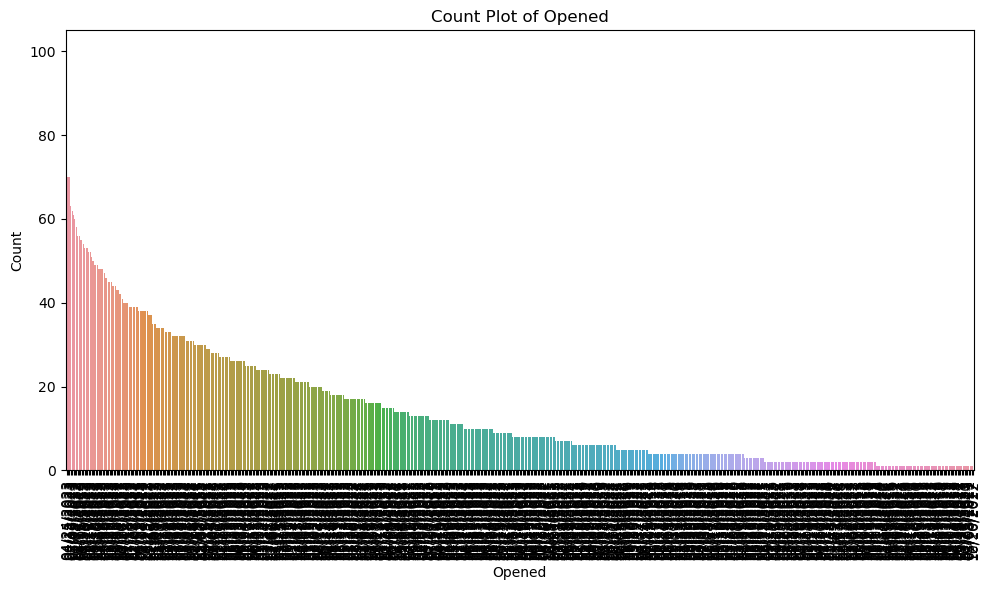

In [393]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Opened', order=df['Opened'].value_counts().index)
plt.title('Count Plot of Opened')
plt.xlabel('Opened')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

In [394]:
threshold = 3  # Adjust this threshold as needed

# Calculate the counts of each company
company_counts = df['Opened'].value_counts()

# Get the companies to drop based on the threshold
companies_to_drop = company_counts[company_counts < threshold].index

# Remove rows with companies that have counts below the threshold
df = df[~df['Opened'].isin(companies_to_drop)]

# Print the modified DataFrame
print(df)

                                       Company  File No.      Opened  \
0                     Anthem Health Plans, Inc   7045593  05/31/2022   
1                     Anthem Health Plans, Inc   7043381  02/28/2022   
2                     Anthem Health Plans, Inc   7044860  05/03/2022   
3                     Anthem Health Plans, Inc   7043381  02/28/2022   
4                     Anthem Health Plans, Inc   7052007  02/23/2023   
...                                        ...       ...         ...   
38225            Gerber Life Insurance Company   7049735  11/29/2022   
38233              ConnectiCare Benefits, Inc.   7049034  10/31/2022   
38234    Combined Insurance Company of America   7045449  05/23/2022   
38238  Cigna Health and Life Insurance Company   7047624  08/31/2022   
38244               Esurance Insurance Company   7016374  08/29/2018   

           Closed                      Coverage        SubCoverage  \
0      06/02/2022                         Group        Health Onl

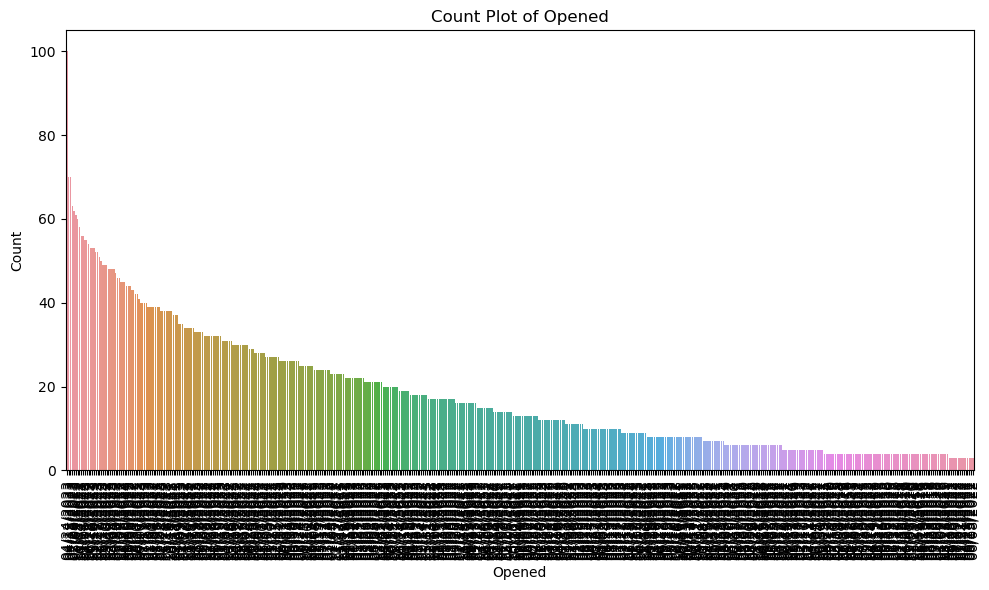

In [395]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Opened', order=df['Opened'].value_counts().index)
plt.title('Count Plot of Opened')
plt.xlabel('Opened')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

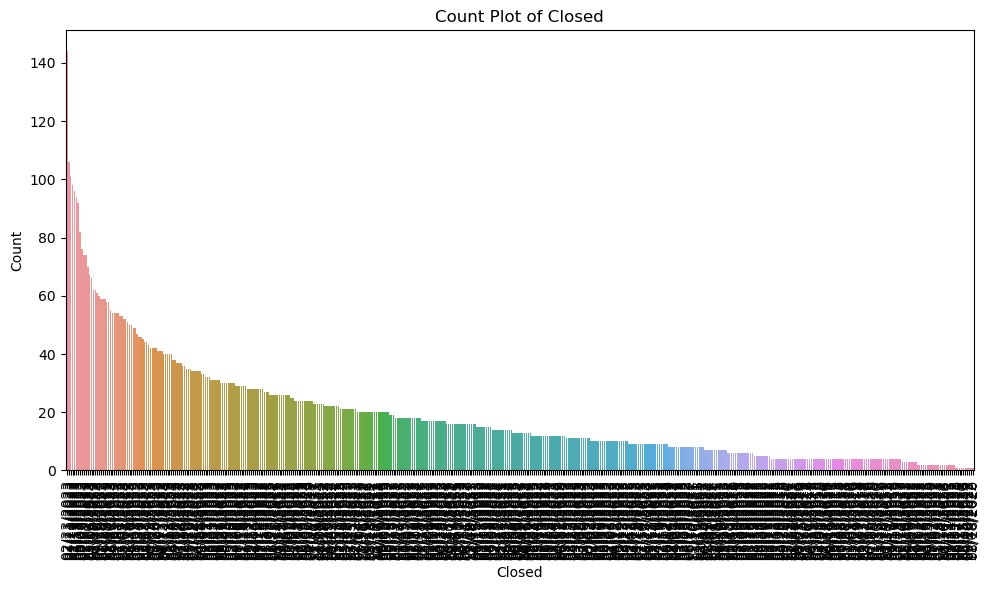

In [396]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Closed', order=df['Closed'].value_counts().index)
plt.title('Count Plot of Closed')
plt.xlabel('Closed')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

In [397]:
threshold = 3  # Adjust this threshold as needed

# Calculate the counts of each company
company_counts = df['Closed'].value_counts()

# Get the companies to drop based on the threshold
companies_to_drop = company_counts[company_counts < threshold].index

# Remove rows with companies that have counts below the threshold
df = df[~df['Closed'].isin(companies_to_drop)]

# Print the modified DataFrame
print(df)

                                       Company  File No.      Opened  \
0                     Anthem Health Plans, Inc   7045593  05/31/2022   
1                     Anthem Health Plans, Inc   7043381  02/28/2022   
2                     Anthem Health Plans, Inc   7044860  05/03/2022   
3                     Anthem Health Plans, Inc   7043381  02/28/2022   
4                     Anthem Health Plans, Inc   7052007  02/23/2023   
...                                        ...       ...         ...   
38225            Gerber Life Insurance Company   7049735  11/29/2022   
38233              ConnectiCare Benefits, Inc.   7049034  10/31/2022   
38234    Combined Insurance Company of America   7045449  05/23/2022   
38238  Cigna Health and Life Insurance Company   7047624  08/31/2022   
38244               Esurance Insurance Company   7016374  08/29/2018   

           Closed                      Coverage        SubCoverage  \
0      06/02/2022                         Group        Health Onl

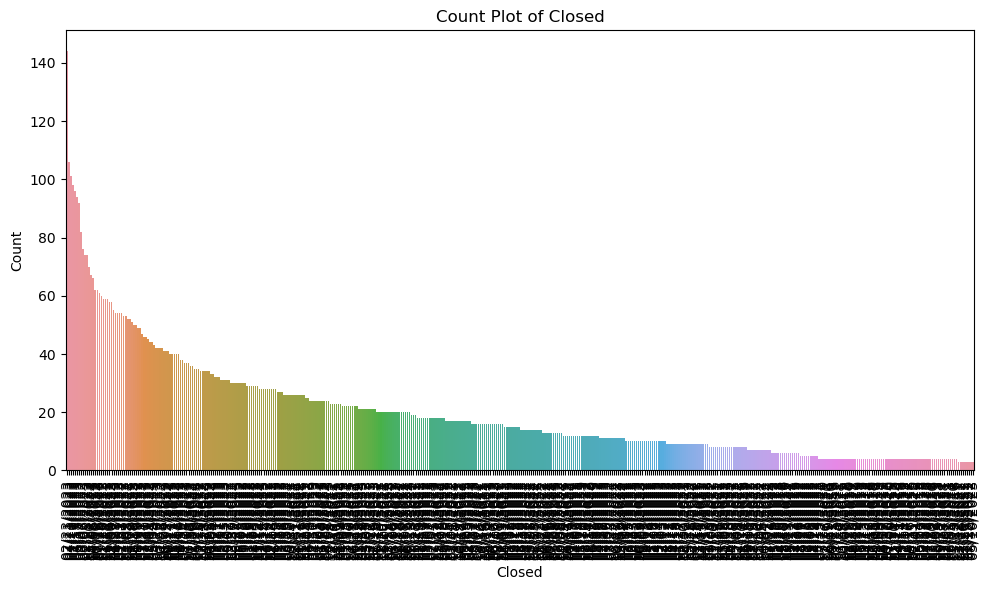

In [398]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Closed', order=df['Closed'].value_counts().index)
plt.title('Count Plot of Closed')
plt.xlabel('Closed')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()

In [399]:
X = df.drop('MONEY', axis=1)
y = df['MONEY']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(df['Company'].unique())

Train and test split

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9342 entries, 0 to 38244
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      9342 non-null   object 
 1   File No.     9342 non-null   int64  
 2   Opened       9342 non-null   object 
 3   Closed       9342 non-null   object 
 4   Coverage     9342 non-null   object 
 5   SubCoverage  9342 non-null   object 
 6   Reason       9342 non-null   object 
 7   SubReason    9342 non-null   object 
 8   Disposition  9342 non-null   object 
 9   Conclusion   9342 non-null   object 
 10  Recovery     9342 non-null   float64
 11  Status       9342 non-null   object 
 12  MONEY        9342 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1021.8+ KB


In [400]:

# Define the categorical columns
categorical_cols = ['Company', 
                    'Reason', 'Disposition', 'Closed', 'Opened', 'Coverage', 'SubCoverage', 'SubReason', 'Status', 'Conclusion']

# Define the numerical columns
numerical_cols = ['File No.', 'Recovery']

# Create preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

preprocessor.fit(X_train)

# Combine train and test data for preprocessing
combined_data = pd.concat([X_train, X_test])
combined_data_transformed = preprocessor.transform(combined_data)
X_train_transformed = combined_data_transformed[:len(X_train)]
X_test_transformed = combined_data_transformed[len(X_train):]


In [401]:



# Define the models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC()),
    ('KNearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB())
]

X_train_dense = X_train_transformed.toarray()
X_test_dense = X_test_transformed.toarray()

# Loop through each model and train
for name, model in models:
    clf = Pipeline(steps=[('classifier', model)])
    clf.fit(X_train_dense, y_train)
    y_pred = clf.predict(X_test_dense)


        # Calculate and display evaluation metrics
    print(f"Model: {name}")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='MADE MONEY')
    recall = recall_score(y_test, y_pred, pos_label='MADE MONEY')
    f1 = f1_score(y_test, y_pred, pos_label='MADE MONEY')
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n")

Model: Logistic Regression
Accuracy: 0.9927252378287633
Precision: 0.9948453608247423
Recall: 0.9830220713073005
F1-Score: 0.9888983774551664
Confusion Matrix:
 [[ 579   10]
 [   3 1195]]


Model: Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[ 589    0]
 [   0 1198]]


Model: Support Vector Machine
Accuracy: 0.9910464465584778
Precision: 0.9965337954939342
Recall: 0.9762308998302207
F1-Score: 0.9862778730703259
Confusion Matrix:
 [[ 575   14]
 [   2 1196]]


Model: KNearest Neighbors
Accuracy: 0.9781757134862898
Precision: 0.9790940766550522
Recall: 0.9541595925297114
F1-Score: 0.9664660361134995
Confusion Matrix:
 [[ 562   27]
 [  12 1186]]


Model: Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[ 589    0]
 [   0 1198]]


Model: Gradient Boosting
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[ 589    0]
 [   0 1198]]


Model: Naive Bayes
Accuracy: 0.8108561835478455
Prec

In [402]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Adjust the range as needed
    'max_depth': [None, 10, 20],  # Adjust the range as needed
    'min_samples_split': [2, 5, 10],  # Adjust the range as needed
    # Add more hyperparameters to the grid as needed
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_transformed, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.9998600419874037


In [403]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': stats.randint(50, 200),  # Adjust the range as needed
    'max_depth': [None, 10, 20],  # Adjust the range as needed
    'min_samples_split': stats.randint(2, 11),  # Adjust the range as needed
    # Add more hyperparameters to the distribution as needed
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_transformed, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 113}
Best Accuracy: 0.9990204896572985


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# List of categorical columns
categorical_cols = ['Company', 'Opened', 'Closed', 'Coverage', 'SubCoverage', 
                    'Reason', 'SubReason', 'Disposition', 'Conclusion', 'Status']

# Create a OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)  # 'drop' parameter avoids multicollinearity

# Create a ColumnTransformer to apply the encoder to specific columns
preprocessor = ColumnTransformer(transformers=[('cat', encoder, categorical_cols)],
                                 remainder='passthrough')  # Pass through non-categorical columns

# Transform your data
X_encoded = preprocessor.fit_transform(df.drop('MONEY', axis=1))  # Assuming 'MONEY' is the target column

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['File No.', 'Recovery']] = scaler.fit_transform(df[['File No.', 'Recovery']])

from sklearn.model_selection import train_test_split

X = df.drop('MONEY', axis=1)
y = df['MONEY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC()),
    ('KNearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Naive Bayes', GaussianNB())]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Machine', SVC()),
    ('KNearest Neighbors', KNeighborsClassifier())
]

for name, model in models:
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Step 5: Evaluate the models
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("---------------------")
    # Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='MADE MONEY')  # Adjust pos_label as needed
recall = recall_score(y_test, y_pred, pos_label='MADE MONEY')  # Adjust pos_label as needed
f1 = f1_score(y_test, y_pred, pos_label='MADE MONEY')  # Adjust pos_label as needed
conf_matrix = confusion_matrix(y_test, y_pred)
for name, model in models:
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
   print(f"Model: {name}")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='MADE MONEY')
    recall = recall_score(y_test, y_pred, pos_label='MADE MONEY')
    f1 = f1_score(y_test, y_pred, pos_label='MADE MONEY')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n")

Company_dummies = pd.get_dummies(df['Company'])
Opened_dummies = pd.get_dummies(df['Opened'])
Closed_dummies = pd.get_dummies(df['Closed'])
Coverage_dummies = pd.get_dummies(df['Coverage'])
SubCoverage_dummies = pd.get_dummies(df['SubCoverage'])
Reason_dummies = pd.get_dummies(df['Reason'])
SubReason_dummies = pd.get_dummies(df['SubReason'])
Disposition_dummies = pd.get_dummies(df['Disposition'])
Conclusion_dummies = pd.get_dummies(df['Conclusion'])
Status_dummies = pd.get_dummies(df['Status'])
df = pd.concat([df,Company_dummies,Opened_dummies,Closed_dummies,Coverage_dummies,SubCoverage_dummies,Reason_dummies,SubReason_dummies,Disposition_dummies,Conclusion_dummies,Status_dummies
],axis=1)

log = LogisticRegression()
log.fit(df[['Company', 'File No.', 'Opened', 'Closed',
       'Coverage', 'SubCoverage', 'Reason',
       'SubReason', 'Disposition', 'Conclusion', 'Status']], df['MONEY'])
       pred = log.predict(df